# Tutorial 1: Introduction to Machine Learning with Python

The goal of this tutorial is to introduce a typical workflow in carrying out ML in Python. This includes, 

1. accessing and organising data,

2. assessing the data,

3. visualising the data,

4. a) creating training, b) test datasets and c) learning a model using them and evaluating its performance. 

In [2]:
import numpy as np
import pandas

from matplotlib import pyplot as plt

%matplotlib inline #makes sure whatever you plot using matplotlib is plotted in the same window

# Set the default figure size.
plt.rcParams["figure.figsize"] = (10, 8)

## 1) Load Data 

Here, we shall load the Iris dataset from a publically available source. 

This dataset consists of 150 samples of 3 classes of iris plants; each datapoint consists of 4 attributes, the 'sepal-length', 'sepal-width', 'petal-length' and'petal-width'. 

Once the data has been downloaded, we can organise them into their classes.

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

# if loading from web doesn't work, this file is already stored in the repository. Uncomment following if necessary.
# url = "./iris.csv"

column_names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

raw_dataset = pandas.read_csv(url, names=column_names)

# print the raw dataset
print(raw_dataset)

# Organise data by class
dataset = raw_dataset.groupby('class')

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## 2) Statistics of the dataset

Pandas has some convenience methods that allow us to easily calculate statistical properties of a dataset.

In [4]:
# Calculate the mean of each attribute. E.g

dataset.mean()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [17]:
# Calculate the standard deviation of each attribute

dataset.std()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [15]:
# Show the minimum of each attribute
dataset.min()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


In [14]:
# Show the maximum of each attribute

dataset.max()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


## 3) Visualise the dataset

Pandas has some convenience functions that allow us to easily visualise our dataset.

[This is the documentation for the basic plotting tools available in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

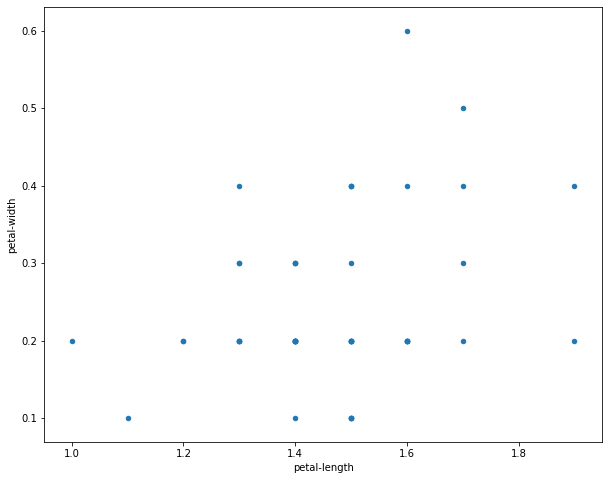

In [19]:
# Try some of them here. 
# For example, try to plot scatter graphs for the Iris-setosa class:
dataset.get_group('Iris-setosa').plot.scatter(x = 'petal-length', y = 'petal-width')


## 4) Classification using Least Squares

Here we will be carrying out classification using the least squares formulation on 2 classes of the dataset. 

a) Create separate datasets for the classes 'Iris-setosa' and 'Iris-versicolor'.

In [20]:
setosa = dataset.get_group("Iris-setosa").dropna()
versicolor = dataset.get_group("Iris-versicolor").dropna()

b) create an output vector $Y^k$, for each class, where $y_i^k = 1$ if $k = $'Iris-setosa' and $-1$ otherwise.

In [26]:
# Insert code here to update 'setosa' and 'versicolor' DataFrames to include an extra column 'output'.
setosa.insert(4, "Output", 1)
versicolor.insert(4, "Output", -1)
print(versicolor)

    sepal-length  sepal-width  petal-length  petal-width  Output
50           7.0          3.2           4.7          1.4      -1
51           6.4          3.2           4.5          1.5      -1
52           6.9          3.1           4.9          1.5      -1
53           5.5          2.3           4.0          1.3      -1
54           6.5          2.8           4.6          1.5      -1
55           5.7          2.8           4.5          1.3      -1
56           6.3          3.3           4.7          1.6      -1
57           4.9          2.4           3.3          1.0      -1
58           6.6          2.9           4.6          1.3      -1
59           5.2          2.7           3.9          1.4      -1
60           5.0          2.0           3.5          1.0      -1
61           5.9          3.0           4.2          1.5      -1
62           6.0          2.2           4.0          1.0      -1
63           6.1          2.9           4.7          1.4      -1
64           5.6         

In [ ]:
assert setosa.shape == (50, 5)
assert versicolor.shape == (50, 5)

c) create training and test datasets, with 20% of the data for testing (80 training points and 20 testing points). 

In [41]:
# Make sure that data from each class is equally distributed.
# Create 'training_data' and 'test_data' DataFrames that contain the appropriate number of samples from each class.
full_data = pandas.concat([setosa,versicolor])
training_data = full_data.sample(80)
mask = full_data.isin(training_data)
test_data = full_data[~mask].dropna()
print(test_data)

    sepal-length  sepal-width  petal-length  petal-width  Output
5            5.4          3.9           1.7          0.4     1.0
6            4.6          3.4           1.4          0.3     1.0
13           4.3          3.0           1.1          0.1     1.0
19           5.1          3.8           1.5          0.3     1.0
26           5.0          3.4           1.6          0.4     1.0
29           4.7          3.2           1.6          0.2     1.0
32           5.2          4.1           1.5          0.1     1.0
37           4.9          3.1           1.5          0.1     1.0
46           5.1          3.8           1.6          0.2     1.0
47           4.6          3.2           1.4          0.2     1.0
49           5.0          3.3           1.4          0.2     1.0
52           6.9          3.1           4.9          1.5    -1.0
54           6.5          2.8           4.6          1.5    -1.0
58           6.6          2.9           4.6          1.3    -1.0
61           5.9         

In [42]:
assert training_data.shape == (80, 5)
assert test_data.shape == (20, 5)

d) apply the least squares solution to obtain an optimal solution for different combinations of the 4 available attributes.

In [43]:
# Create all possible combinations of attributes. 
from itertools import chain, combinations

def all_combinations(attributes):
    return chain(*map(lambda i: combinations(attributes, i), range(1, len(attributes)+1)))

_attributes = [name for name in column_names if name != 'class']
attribute_combinations = all_combinations(_attributes) #Note that this is an iterable object. 

# Complete the function that takes in a list of attributes, and outputs the predictions after carrying out least squares.
def return_predictions(attributes, training_data=training_data, testing_data=test_data):    
    
    X = training_data[attributes].values.reshape(-1, len(attributes))
    _ = np.tile(np.array([1])), 
    
    return predictions

e) evaluate which input attributes are the best.

In [ ]:
# Complete the function below that takes in a predictions vector, and outputs the mean squared error.
def return_mse(predictions, testing_data=test_data):
    
    
    return mse

# evaluate
for attributes in attribute_combinations:
    preds = return_predictions(list(attributes))
    print(f"{str(attributes):<70} MSE: {return_mse(preds)}")